<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Clusters_K_mean_data1_6clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means** clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. It starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster. In the analysis we assume that number of cluster is given in advanced and we have to put points in one of the group.

In [ ]:
import numpy as np
import torch

In [ ]:
import pandas as pd

In [ ]:
log_path = "/content/logs_CAD_2024_1.xlsx"

In [ ]:
print(log_path)

/content/logs_CAD_2024_1.xlsx


In [ ]:
logs_Dataset = pd.read_excel("/content/logs_CAD_2024_1.xlsx")

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
class logs_Dataset(): # Removed inheritance from data_table.DataTable since it's not being used
    """e

    """
    def __init__(self): # Added constructor to initialize instance variables
        self.log_path = pd.read_excel("/content/logs_CAD_2024_1.xlsx")

logs = logs_Dataset() # Create an instance of the class
x = logs.log_path.iloc[1:6029, 1:6].values
y = logs.log_path.iloc[1:6029, :6].values # Assuming you want values here as well

In [ ]:
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=6, cluster_std=0.60, random_state=0)

# Convert data to PyTorch tensor
tensor_data = torch.from_numpy(data).float()

In [ ]:
# Initialize centroids randomly
centroids = tensor_data[torch.randperm(tensor_data.size(0))[:6]]

# Define the number of iterations
num_iterations = 100

for _ in range(num_iterations):
    # Calculate distances from data points to centroids
    distances = torch.cdist(tensor_data, centroids)

    # Assign each data point to the closest centroid
    _, labels = torch.min(distances, dim=1)

    # Update centroids by taking the mean of data points assigned to each centroid
    for i in range(6):
        if torch.sum(labels == i) > 0:
            centroids[i] = torch.mean(tensor_data[labels == i], dim=0)

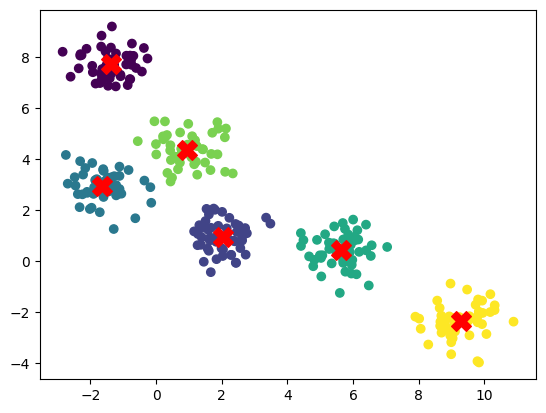

In [ ]:
# Visualize clusters
plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.show()